## Description

The string "PAYPALISHIRING" is written in a zigzag pattern on a given number of rows like this: (you may want to display this pattern in a fixed font for better legibility)

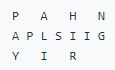

And then read line by line: "PAHNAPLSIIGYIR"

Write the code that will take a string and make this conversion given a number of rows:

"string convert(string s, int numRows);"

Difficulty: Medium

## Example 1

Input: s = "PAYPALISHIRING", numRows = 3

Output: "PAHNAPLSIIGYIR"

## Example 2

Input: s = "PAYPALISHIRING", numRows = 4

Output: "PINALSIGYAHRPI"

Explanation:

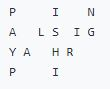

## Example 3

Input: s = "A", numRows = 1

Output: "A"

## Constraints

1 <= s.length <=1000

s consists of English letters (uppercase and lower case), ',', and '.'.

1<= numRows <=1000

## Solution

In [4]:
from __future__ import annotations #this was imported so that I could use built in types as generics. 
# Only >3.9 versions of python can use built in types as generics without this import.

In [5]:
# First accepted solution. This one was written without assistance.

# I thought up of this particular solution after considering the relationship between the number of rows inputted and the number
# of times we must increment through the input string to reach the same 'zig-zag' position we start from. I found that the
# number of times we must increment through the input string to reach the same position as before is defined by the number of
# rows inputted as such:
# increment = 2*numRows - 2

# This increment calculation allows us to handle the first and last rows in any given zig-zag structure, and is instrumental
# in allowing us to handle all rows in between. Let us consider 'Example 2' above. We have four rows present, row0, row1, row2,
# and row3. Let's start at index 0 of the input string, 'P', which also happens to be the first letter in row0, and increment
# by 2*numRows-2. We are now at the 6th index of the input string, 'I', which happens to be the second letter in row0. If we 
# increment again, we reach the last letter in row0, 'N'. At this point, if we try to increment again, we will hit an 'index
# out of bounds' error, which will tell us that we need to move onto row1 (in the code itself, we avoid encountering this error
# by utilizing the 'range' function to define an end boundary past which we will not be incrementing).

# Now, let us say we have moved onto the next row, row1. We start at index 1, 'A', which also happens to be the first letter in row1,
# and we increment by 2*numRows-2. We are now at index 7, 'S', which is the same position within the current 'zigzag' as index 1.
# However, it is the third letter within row1, which means we have skipped over one letter. In order to get back to this letter
# we have skipped, we can just decrement by 2 positions, reaching index 5, 'L'. This pattern holds regardless of which 'zig-zag'
# you are currently on. For example, say we are at index 7, 'S'. From here, we just increment by 2*numRows-2, and decrement by 2
# positions to reach the letter that is in between index 7 and 13 but in the same row. 

# Let us apply this to row2, the other row that is not the first or the last row. Let's say we start at index 2, 'Y', which happens
# to be the first letter in row2. If we increment by 2*numRows-1, we reach index 8, 'H', which is the third letter in row2. We 
# have skipped over the second letter in row2, and to get back to it, we must decrement by 4 positions. Doing so, we reach index 4,
# 'A', which happens to be the second letter in row2.

# You may have noticed that the number by which we must decrement after incrementing in order to not skip over any of the letters
# within a given non-last/non-first row is 2 * (rowIndex). For example, in order to reach the second letter of row1, we started at 
# the first letter of row 1 (index 1 of the input string), incremented by 2*numRows-2, and decremented by 2*(rowIndex) where
# rowIndex = 1 since we are on row1. That is, we start at the first letter of any given row that is not the first or last row
# (where the index of the first letter for a given row happens to always be the same as that row's index), add (2*numRows-2*rowIndex-2) 
# to it's index, and we have reached the index of the second letter within that given row. 

# Given the above mechanisms, we can now convert an input string into its 'zig-zagged' counterpart given the number of rows.
# We first check for edge cases, particularly cases where numRows == 1, or numRows> len(s). In both of these cases, we just return
# the input string itself since the 'zigzag' transformation won't actually change the order in which we output the string components.

# Then, we go about defining a range to hold our row indices (range(numRows)), and then we define another range that holds the 
# indexes of all letters in a given row that are in the same 'zig-zag' positions (range(i, len(s), 2*numRows-2), where 'i' is
# the current row that we are on and 's' is the input string). The first will allow us to iterate through each row, whereas the second
# will allow us to maneuver within said row so as to retrieve letters within that row in left to right order. However, the second,
# as it currently is, lacks the 'decrement' factor we discussed earlier, and can therefore only be utilized to handle the first
# and last rows within the 'zigzagged' input string. As you can see in the code below, we implemented the 'decrement' factor so that
# for the non-first/non-last rows, we are able to account for letters that fall in between two subsequent index positions within
# the current iteration of the second range. Basically, say we are at the first letter of row1 (which is the second row since row0
# is the first row), which is index 1 of the input string. By incrementing by 2*numRows-2, we reach index 7 which is the next letter
# at the same position in the next zig zag as the current letter. However, because we have a zig zag structure, every time 
# we increment to reach the next letter at the same position in the next zig zag while in a non-first/non-last row, we are skipping
# over one of the letters inside the given row, which, although not in the exact same position of the zig-zag as the first letter,
# still exists within the row we are currently examining. This is why we must include a decrement factor which allows us to 
# access that 'lost in the middle' letter prior to incrementing our index in the second range to move onto the
# next letter that occupies the same position in the zig-zag structure as our current index. 


# @param 's': Input string that we will apply a zigzag conversion to.
# @param 'numRows': Number of rows that the zigzag conversion should utilize. 
# @returns 'return_this': Input string except it has successfully been zigzagged.
class Solution:
    def convert(self, s: str, numRows: int) -> str:
        if numRows == 1 or numRows > len(s):
            return s
        return_this = ''
        increment = 2*numRows - 2
        for i in range(numRows):
            for y in range(i, len(s), increment):
                return_this = return_this + s[y]
                j = y + increment-2*i
                if i!=0 and i!=numRows-1 and j<len(s):
                    return_this = return_this + s[j]
        return return_this